In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [14]:
df_5d = pd.read_csv('copper_returns_5d.csv',index_col=0)
df_10d = pd.read_csv('copper_returns_10d.csv',index_col=0)
df_20d = pd.read_csv('copper_returns_20d.csv',index_col=0)

In [15]:
# contar filas con null para cada dataframe
print(df_5d.isnull().sum())
print(df_10d.isnull().sum())
print(df_20d.isnull().sum())

LMCADS03         0
LMCADY           0
DXY              0
COMXCOPR         0
SPX              0
BCOM             0
MXWD             0
CL1              0
XAU              0
XAG              0
LMCADY_acu_5d    0
LMCADY_std_5d    0
dtype: int64
LMCADS03          0
LMCADY            0
DXY               0
COMXCOPR          0
SPX               0
BCOM              0
MXWD              0
CL1               0
XAU               0
XAG               0
LMCADY_acu_10d    0
LMCADY_std_10d    0
dtype: int64
LMCADS03          0
LMCADY            0
DXY               0
COMXCOPR          0
SPX               0
BCOM              0
MXWD              0
CL1               0
XAU               0
XAG               0
LMCADY_acu_20d    0
LMCADY_std_20d    0
dtype: int64


In [16]:
# tipos
print(df_5d.dtypes)
print(df_10d.dtypes)
print(df_20d.dtypes)

LMCADS03         float64
LMCADY           float64
DXY              float64
COMXCOPR         float64
SPX              float64
BCOM             float64
MXWD             float64
CL1              float64
XAU              float64
XAG              float64
LMCADY_acu_5d    float64
LMCADY_std_5d    float64
dtype: object
LMCADS03          float64
LMCADY            float64
DXY               float64
COMXCOPR          float64
SPX               float64
BCOM              float64
MXWD              float64
CL1               float64
XAU               float64
XAG               float64
LMCADY_acu_10d    float64
LMCADY_std_10d    float64
dtype: object
LMCADS03          float64
LMCADY            float64
DXY               float64
COMXCOPR          float64
SPX               float64
BCOM              float64
MXWD              float64
CL1               float64
XAU               float64
XAG               float64
LMCADY_acu_20d    float64
LMCADY_std_20d    float64
dtype: object


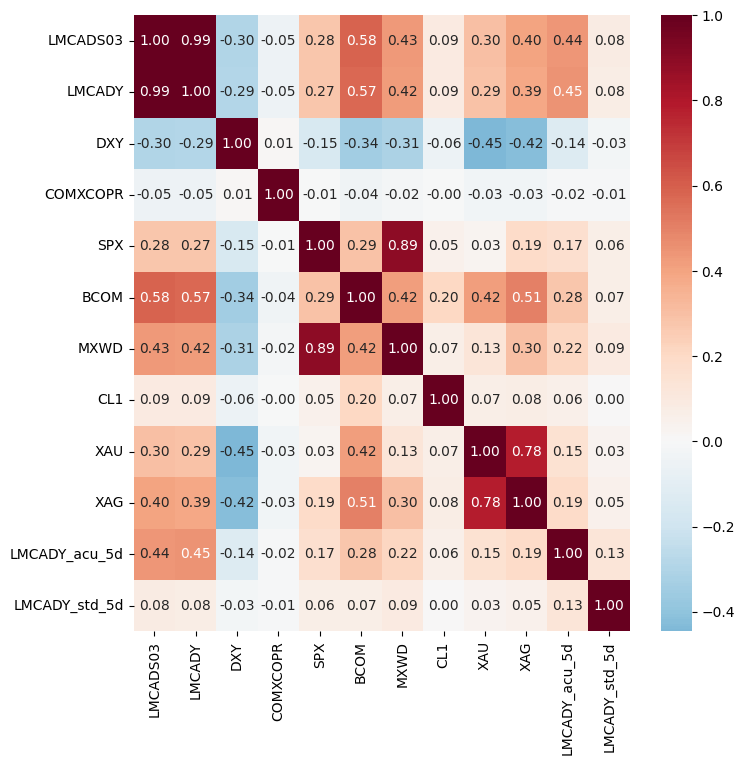

In [17]:
# graph correlation, excluding non-numeric columns
df_5d_numeric = df_5d.select_dtypes(include=[np.number])

corr_matrix = df_5d_numeric.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
# increase size of heatmap
plt.show()

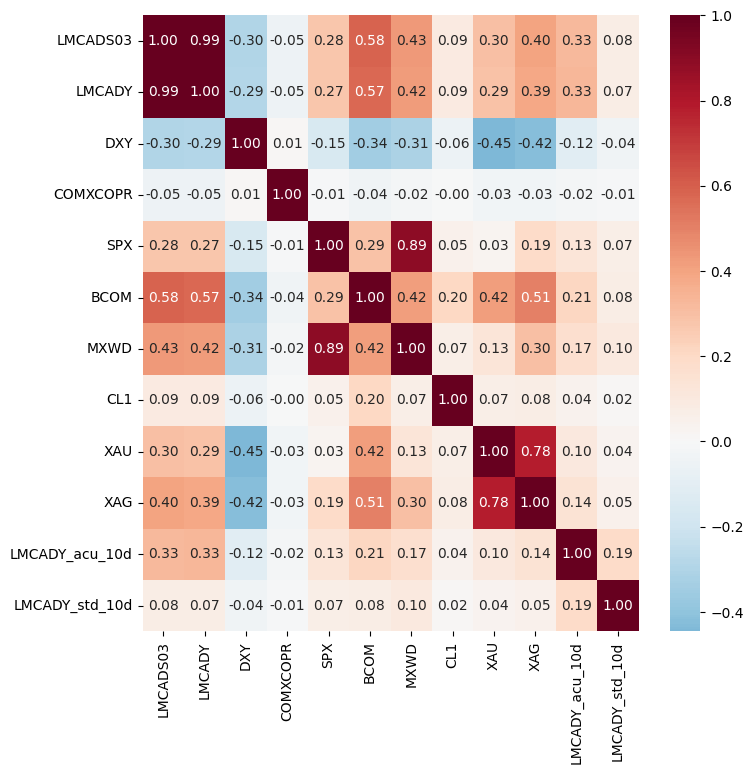

In [18]:
# graph correlation, excluding non-numeric columns
df_numeric = df_10d.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
# increase size of heatmap
plt.show()

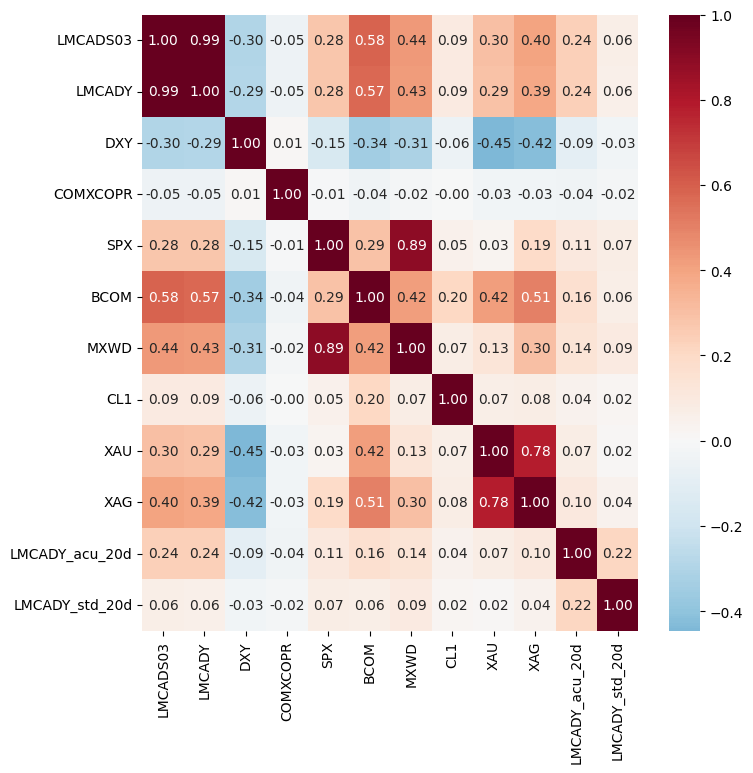

In [19]:
# graph correlation, excluding non-numeric columns
df_numeric = df_20d.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
# increase size of heatmap
plt.show()

In [20]:
# prueba de causalidad de granger
max_lag = 1
test_results = {}

for column in df_5d.columns.drop('LMCADY'):
    test_result = grangercausalitytests(df_5d[['LMCADY', column]], max_lag, verbose=False)
    p_values = [round(test_result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
    test_results[column] = p_values

granger_test_df = pd.DataFrame(test_results, index=[f'Lag {i+1}' for i in range(max_lag)])
granger_test_df

c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warni

,LMCADS03,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG,LMCADY_acu_5d,LMCADY_std_5d
Lag 1,0.0552,0.0016,0.651,0.2668,0.3127,0.0,0.9501,0.9511,0.3461,0.8184,0.0


In [21]:
# prueba de causalidad de granger
max_lag = 1
test_results = {}

for column in df_10d.columns.drop('LMCADY'):
    test_result = grangercausalitytests(df_10d[['LMCADY', column]], max_lag, verbose=False)
    p_values = [round(test_result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
    test_results[column] = p_values

granger_test_df = pd.DataFrame(test_results, index=[f'Lag {i+1}' for i in range(max_lag)])
granger_test_df

c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warni

,LMCADS03,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG,LMCADY_acu_10d,LMCADY_std_10d
Lag 1,0.0547,0.0016,0.659,0.2706,0.3104,0.0,0.9518,0.9642,0.3418,0.1087,0.0


In [22]:
# prueba de causalidad de granger
max_lag = 1
test_results = {}

for column in df_20d.columns.drop('LMCADY'):
    test_result = grangercausalitytests(df_20d[['LMCADY', column]], max_lag, verbose=False)
    p_values = [round(test_result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
    test_results[column] = p_values

granger_test_df = pd.DataFrame(test_results, index=[f'Lag {i+1}' for i in range(max_lag)])
granger_test_df

c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\gapuj\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warni

,LMCADS03,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG,LMCADY_acu_20d,LMCADY_std_20d
Lag 1,0.0563,0.0015,0.6658,0.263,0.3199,0.0,0.96,0.9715,0.3314,0.0018,0.0


In [23]:
# drop CL1 and COMXCOPR

df_5d = df_5d.drop(columns=['CL1', 'COMXCOPR'])
df_10d = df_10d.drop(columns=['CL1', 'COMXCOPR'])
df_20d = df_20d.drop(columns=['CL1', 'COMXCOPR'])

In [24]:
# export final dataset

df_5d. to_csv('./out/copper_returns_5d_final.csv')
df_10d.to_csv('./out/copper_returns_10d_final.csv')
df_20d.to_csv('./out/copper_returns_20d_final.csv')